In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np

# Step 1: Load the data from a CSV file
data = pd.read_csv('sample_classifier.csv')



In [8]:
# Step 2: Replace missing values with zeros
def replace_missing_with_zeros(data):
    """
    Replace missing values with zeros in the dataset.

    Parameters:
    - data: pandas DataFrame, input dataset with missing values

    Returns:
    - data_filled: pandas DataFrame, dataset with missing values replaced by zeros
    """
    data = data.fillna(0)
    return data

data = replace_missing_with_zeros(data)

# Check for missing values after replacement
print(data.isnull().sum())





Species                              0
L/W ratio                            0
Leaf Height Including Petiole(cm)    0
Top Leaf Angle                       0
Base Leaf-Petiole Angle              0
dtype: int64


In [3]:
# Step 3: Rename columns according to the features
features = ['Species', 'L/W ratio', 'Leaf Height Including Petiole(cm)', 'Top Leaf Angle', 'Base Leaf-Petiole Angle']
data.columns = features

# Step 4: Inspect the data
print(data.head())



              Species  L/W ratio  Leaf Height Including Petiole(cm)  \
0     Bridelia retusa       2.83                               16.2   
1     Psidium guajava       1.71                               12.3   
2  Capparis zeylanica       1.91                               11.6   
3     Bridelia retusa       2.41                               15.3   
4     Psidium guajava       1.44                               11.0   

   Top Leaf Angle  Base Leaf-Petiole Angle  
0              76                      114  
1             114                      127  
2              86                      108  
3              87                      136  
4             125                      137  


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Species                            89 non-null     object 
 1   L/W ratio                          89 non-null     float64
 2   Leaf Height Including Petiole(cm)  89 non-null     float64
 3   Top Leaf Angle                     89 non-null     int64  
 4   Base Leaf-Petiole Angle            89 non-null     int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 3.6+ KB


In [5]:
# Separate features and target
features = data.drop('Species', axis=1)
labels = data['Species'].to_numpy()  


In [6]:
from sklearn.preprocessing import OneHotEncoder

# Assuming labels is a numpy array
encoder = OneHotEncoder(sparse=False)
labels_reshaped = labels.reshape(-1, 1)
labels_onehot = encoder.fit_transform(labels_reshaped)

In [7]:
from sklearn.preprocessing import StandardScaler

# Standardize features (assuming numerical features)
scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


In [10]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets (80% train, 20% test)
train_features, test_features, train_labels, test_labels = train_test_split(features_normalized, labels_onehot, test_size=0.2, random_state=42)

# Further split the training data to create a validation set (e.g., 80% train, 20% validation)
train_features, val_features, train_labels, val_labels = train_test_split(train_features, train_labels, test_size=0.25, random_state=42)

# Now we have training, validation, and testing data (features and labels)
print(f"Train size = {len(train_features)}, Validation size = {len(val_features)}, Test size = {len(test_features)}")


Train size = 53, Validation size = 18, Test size = 18


This code snippet illustrates hyperparameter tuning using grid search with Keras models to maximize classifier performance. It systematically explores various hyperparameters to optimize model accuracy on unseen data.








In [74]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.regularizers import l2
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Define your model architecture
def create_model(learning_rate=0.01, num_hidden_layers=1, input_layer_units=64, hidden_layer_units=32, l2_reg=0.01):
    model = Sequential()
    model.add(Dense(input_layer_units, activation='relu', input_shape=(train_features.shape[1],), kernel_regularizer=l2(l2_reg)))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(hidden_layer_units, activation='relu', kernel_regularizer=l2(l2_reg)))
    
    model.add(Dense(3, activation='softmax'))  # Assuming output shape is (3,)
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Define the hyperparameter search space
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'num_hidden_layers': [1, 2, 3],
    'input_layer_units': [64, 128, 256],
    'hidden_layer_units': [32, 64, 128],
    'l2_reg': [0.001, 0.01, 0.1]  # Regularization strength
}

# Perform grid search
gs = GridSearchCV(estimator=model, param_grid=param_grid, cv=10) 
gs.fit(train_features, train_labels)

# Get the best model and its parameters
best_model = gs.best_estimator_.model
best_params = gs.best_params_
accuracy = gs.best_score_ 

# Print results
print("Training Accuracy:", accuracy)
print("Best Params:", best_params)

# Evaluate the best model on the test set
loss, accuracy = best_model.evaluate(test_features, test_labels, verbose=0)
print("Test accuracy with Hyperparameter Tuning:", accuracy)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)


C:\Users\nusra\.conda\envs\tf\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


3/3 [==============================] - 1s 10ms/step - loss: 1.3424 - accuracy: 0.7324
Training Accuracy: 0.9160714328289032
Best Params: {'hidden_layer_units': 128, 'input_layer_units': 256, 'l2_reg': 0.001, 'learning_rate': 0.01, 'num_hidden_layers': 3}
Test accuracy with Hyperparameter Tuning: 0.9444444179534912
Best Hyperparameters: {'hidden_layer_units': 128, 'input_layer_units': 256, 'l2_reg': 0.001, 'learning_rate': 0.01, 'num_hidden_layers': 3}


Selected Model Overview

Training Accuracy: 91.61%
Test Accuracy with Hyperparameter Tuning: 94.44%

Best Hyperparameters:
Number of Hidden Layers: 3
Number of Units in Input Layer: 256
Number of Units in Hidden Layers: 128
Learning Rate: 0.01
L2 Regularization Strength: 0.001

Model Selection Criteria

The selected model achieved a high training accuracy of 91.61% and a test accuracy of 94.44% after hyperparameter tuning. Based on the provided best hyperparameters, the model architecture consists of an input layer with 256 units, three hidden layers with 128 units each, and L2 regularization with a strength of 0.001. The learning rate was set to 0.01 to facilitate effective optimization during training. This model configuration represents the optimal choice for maximizing classification performance on the given dataset.

In [25]:
import numpy as np
from keras import models, layers, regularizers, optimizers, callbacks

# Define the Keras model with hyperparameters
model = models.Sequential([
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(4,)),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(3, activation='softmax')
])



In [26]:
# Compile the model with the specified learning rate
optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])




In [33]:
# Early stopping callback to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model with validation data
history = model.fit(train_features, train_labels, epochs=300, batch_size=1,
                    validation_data=(val_features, val_labels), callbacks=[early_stopping])

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_features, test_labels)
print(f"Test loss: {test_loss}, Test accuracy: {test_accuracy}")

Epoch 1/300
53/53 [==============================] - 0s 3ms/step - loss: 0.0636 - accuracy: 1.0000 - val_loss: 0.1729 - val_accuracy: 0.9444
Epoch 2/300
53/53 [==============================] - 0s 3ms/step - loss: 0.0535 - accuracy: 1.0000 - val_loss: 0.2009 - val_accuracy: 0.8889
Epoch 3/300
53/53 [==============================] - 0s 3ms/step - loss: 0.0445 - accuracy: 1.0000 - val_loss: 0.1239 - val_accuracy: 1.0000
Epoch 4/300
53/53 [==============================] - 0s 3ms/step - loss: 0.1745 - accuracy: 0.9623 - val_loss: 0.2881 - val_accuracy: 0.8889
Epoch 5/300
53/53 [==============================] - 0s 3ms/step - loss: 0.1540 - accuracy: 0.9623 - val_loss: 0.1670 - val_accuracy: 0.9444
Epoch 6/300
1/1 [==============================] - 0s 19ms/step - loss: 1.9284 - accuracy: 0.9444
Test loss: 1.9284379482269287, Test accuracy: 0.9444444179534912


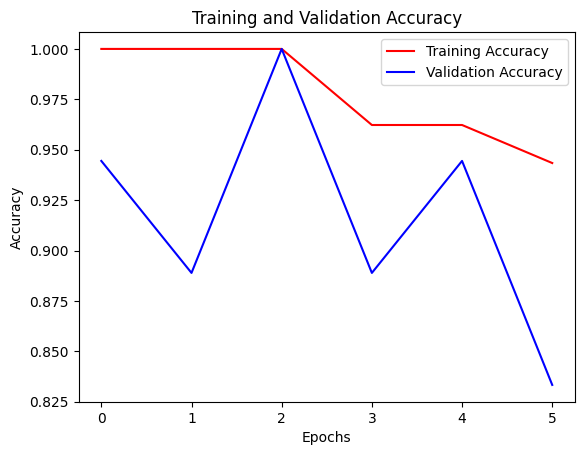

In [34]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy

plt.plot(history.history['accuracy'], 'r', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



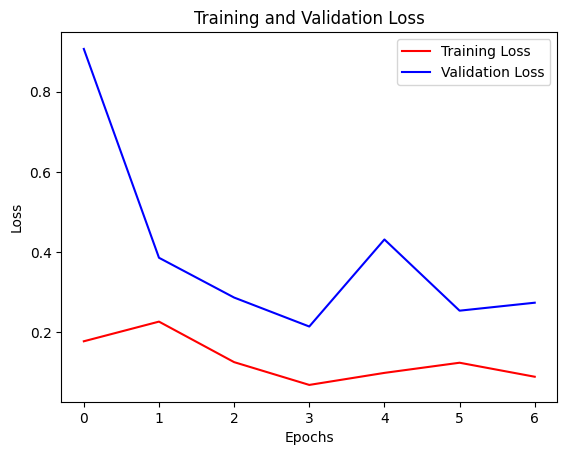

In [32]:
# Plotting training and validation loss

plt.plot(history.history['loss'], 'r', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Explanation of K-Fold Cross Validation

K-Fold Cross Validation splits data into k subsets, iteratively training on k-1 folds and validating on the remaining fold. It enhances model evaluation by maximizing data utilization, reducing variance, and providing robust estimates of performance, aiding in model selection and hyperparameter tuning.

In [36]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder
from keras import models, layers, regularizers, callbacks
from keras.callbacks import ModelCheckpoint

# Define the Keras model structure with specified parameters
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

# Assuming labels_onehot is a numpy array containing one-hot encoded labels
# Assuming features_normalized is a numpy array containing normalized features

# Splitting data into folds for cross-validation
splitter = KFold(n_splits=5, shuffle=True, random_state=42)

# Looping through each fold
fold_accuracies = []
history_per_fold = []

for fold_number, (train_index, test_index) in enumerate(splitter.split(features_normalized), start=1):
    print(f"Fold {fold_number}:")
    
    # Extracting data for training and testing in this fold
    train_features = features_normalized[train_index]
    test_features = features_normalized[test_index]
    train_labels = labels_onehot[train_index]
    test_labels = labels_onehot[test_index]

    # Define the Keras model
    model = create_model(input_shape=train_features.shape[1:], num_classes=train_labels.shape[1])

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    # Early stopping callback to prevent overfitting
    early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

    # Model checkpoint to save the best model based on validation loss
    model_checkpoint = ModelCheckpoint(filepath=f'best_model_fold_{fold_number}.h5',
                                       monitor='val_loss',
                                       save_best_only=True,
                                       verbose=1)

    # Train the model
    history = model.fit(train_features, train_labels, epochs=300, batch_size=32,
                        validation_split=0.2, callbacks=[early_stopping, model_checkpoint], verbose=0)

    # Store the history for each fold
    history_per_fold.append(history)

    # Evaluate the model on the test set
    test_loss, test_accuracy = model.evaluate(test_features, test_labels, verbose=0)
    print(f"Test Accuracy: {test_accuracy}")
    fold_accuracies.append(test_accuracy)

# Calculate and print the average test accuracy across all folds
average_test_accuracy = np.mean(fold_accuracies)
print(f"Average Test Accuracy with Hyperparameter Tuning: {average_test_accuracy}")


Fold 1:

Epoch 1: val_loss improved from inf to 1.19444, saving model to best_model_fold_1.h5

Epoch 2: val_loss improved from 1.19444 to 1.06522, saving model to best_model_fold_1.h5

Epoch 3: val_loss improved from 1.06522 to 0.95181, saving model to best_model_fold_1.h5

Epoch 4: val_loss improved from 0.95181 to 0.85332, saving model to best_model_fold_1.h5

Epoch 5: val_loss improved from 0.85332 to 0.76546, saving model to best_model_fold_1.h5

Epoch 6: val_loss improved from 0.76546 to 0.68423, saving model to best_model_fold_1.h5

Epoch 7: val_loss improved from 0.68423 to 0.60984, saving model to best_model_fold_1.h5

Epoch 8: val_loss improved from 0.60984 to 0.54442, saving model to best_model_fold_1.h5

Epoch 9: val_loss improved from 0.54442 to 0.48649, saving model to best_model_fold_1.h5

Epoch 10: val_loss improved from 0.48649 to 0.43672, saving model to best_model_fold_1.h5

Epoch 11: val_loss improved from 0.43672 to 0.39507, saving model to best_model_fold_1.h5

Epo

In [37]:
# Train the final model on the entire dataset
final_model = create_model(input_shape=features_normalized.shape[1:], num_classes=labels_onehot.shape[1])

final_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping callback to prevent overfitting
early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Model checkpoint to save the best model based on validation loss
model_checkpoint = ModelCheckpoint(filepath='final_model.h5',
                                   monitor='val_loss',
                                   save_best_only=True,
                                   verbose=1)

# Train the final model
final_model.fit(features_normalized, labels_onehot, epochs=300, batch_size=32,
                validation_split=0.2, callbacks=[early_stopping, model_checkpoint], verbose=0)

# Save the final model
final_model.save('final_model.h5')

# Print the average test accuracy
print(f"The final model is saved as 'final_model.h5' with an average test accuracy from cross-validation: {average_test_accuracy}")


Epoch 1: val_loss improved from inf to 1.07612, saving model to final_model.h5

Epoch 2: val_loss improved from 1.07612 to 0.93426, saving model to final_model.h5

Epoch 3: val_loss improved from 0.93426 to 0.81076, saving model to final_model.h5

Epoch 4: val_loss improved from 0.81076 to 0.70080, saving model to final_model.h5

Epoch 5: val_loss improved from 0.70080 to 0.60134, saving model to final_model.h5

Epoch 6: val_loss improved from 0.60134 to 0.51681, saving model to final_model.h5

Epoch 7: val_loss improved from 0.51681 to 0.44622, saving model to final_model.h5

Epoch 8: val_loss improved from 0.44622 to 0.39327, saving model to final_model.h5

Epoch 9: val_loss improved from 0.39327 to 0.35326, saving model to final_model.h5

Epoch 10: val_loss improved from 0.35326 to 0.32227, saving model to final_model.h5

Epoch 11: val_loss improved from 0.32227 to 0.29967, saving model to final_model.h5

Epoch 12: val_loss improved from 0.29967 to 0.27619, saving model to final_mo

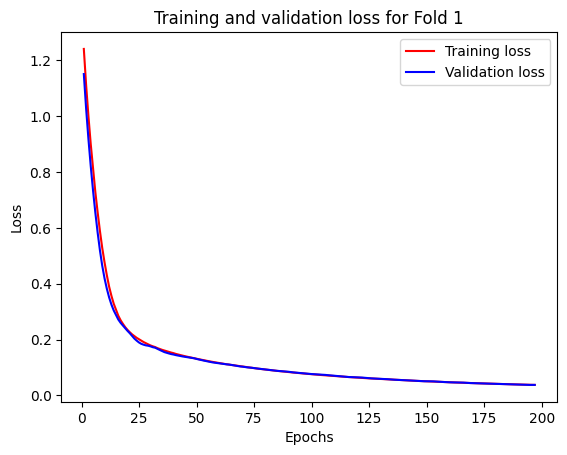

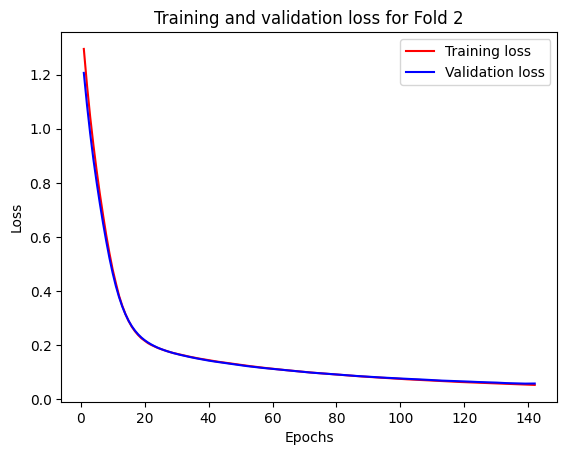

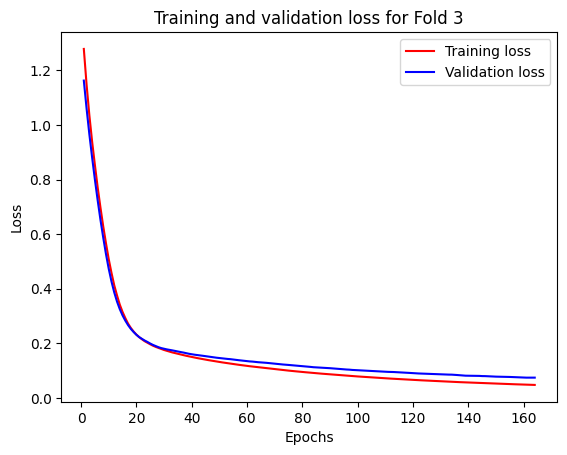

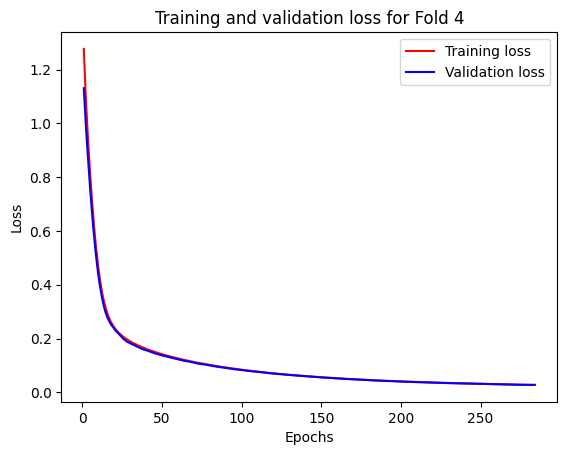

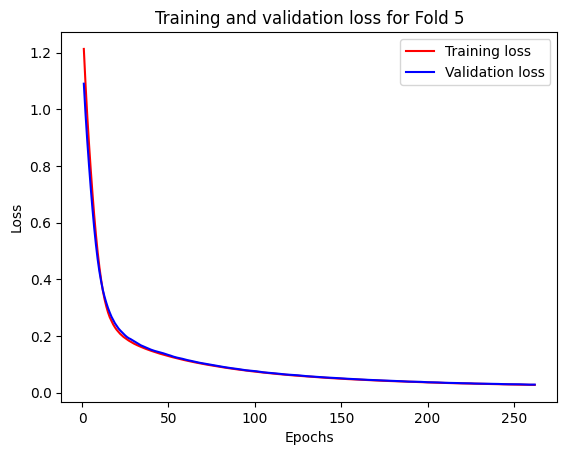

In [10]:
import matplotlib.pyplot as plt

def plot_loss(history_per_fold):
    """
    Plots the training and validation loss for each fold.
    
    Parameters:
    history_per_fold (list): List of Keras History objects, one for each fold.
    """
    for fold_number, history in enumerate(history_per_fold):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)
        
       
        plt.plot(epochs, loss, 'r', label='Training loss')
        plt.plot(epochs, val_loss, 'b', label='Validation loss')
        plt.title(f'Training and validation loss for Fold {fold_number + 1}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Call the function to plot the loss after model training
plot_loss(history_per_fold)


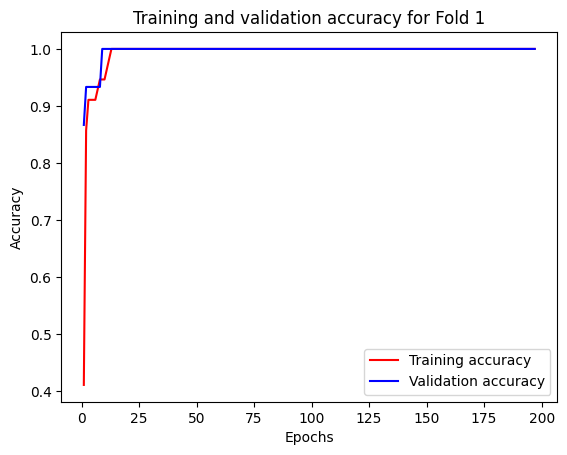

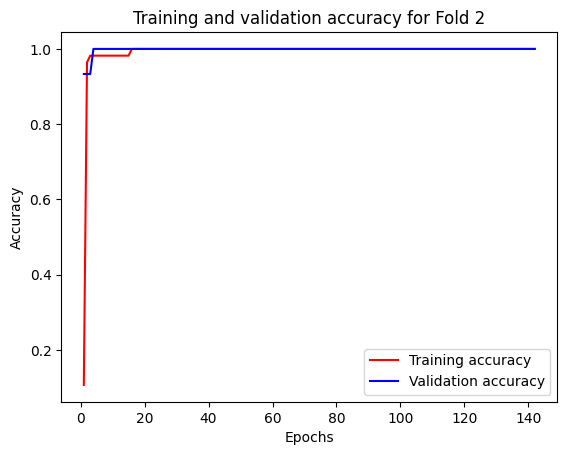

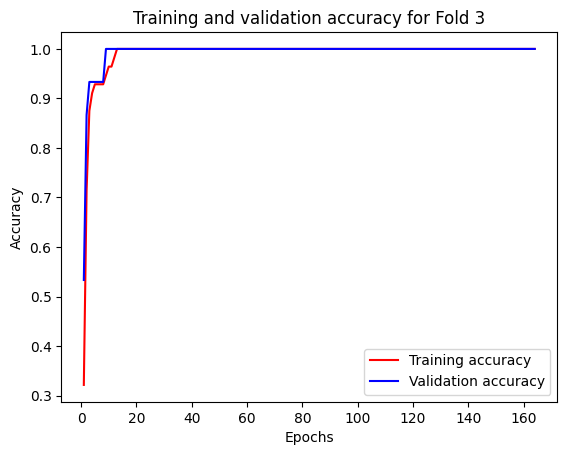

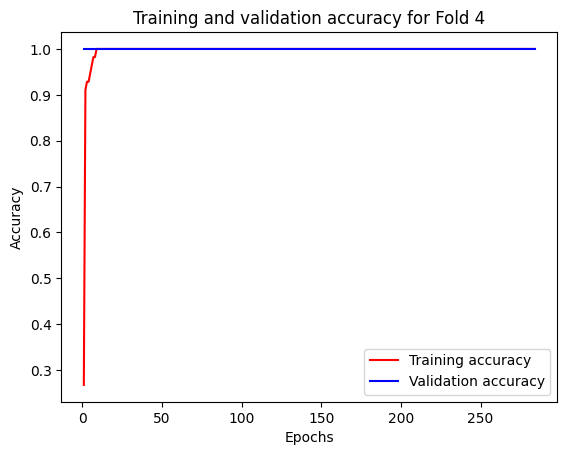

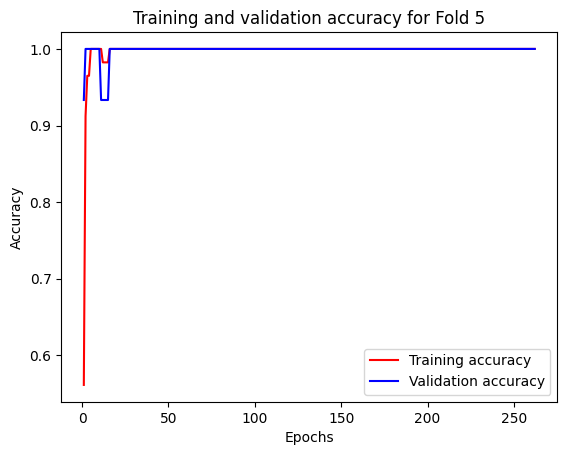

In [11]:
import matplotlib.pyplot as plt

def plot_accuracy_per_fold(history_per_fold):
    """
    Plots the training and validation accuracy separately for each fold.
    
    Parameters:
    history_per_fold (list): List of Keras History objects, one for each fold.
    """
    for fold_number, history in enumerate(history_per_fold):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        epochs = range(1, len(acc) + 1)

       
        plt.plot(epochs, acc, 'r', label='Training accuracy')
        plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
        plt.title(f'Training and validation accuracy for Fold {fold_number + 1}')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.show()

# Assuming 'history_per_fold' is a list containing the training history of each fold
plot_accuracy_per_fold(history_per_fold)


In [12]:
# Predict probabilities for the test samples
predictions = model.predict(test_features)

# Display the predicted probabilities
predictions.shape

1/1 [==============================] - 0s 99ms/step


(17, 3)

In [13]:
np.sum(predictions[0])

1.0

In [14]:
np.argmax(predictions[0])

2